In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, confusion_matrix, balanced_accuracy_score
from imblearn.under_sampling import NearMiss

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
data = pd.read_csv('startup_data.csv')

In [3]:
data.shape

(923, 49)

In [4]:
data_to_test = data.tail(100)
data_to_test.to_csv(r"C:\Users\CChelmi\BBDA_project3_supervised_ML\cleaning\100rowstest_data_for_test", index = False)
data_to_test.index
data.drop(data_to_test.index).head()
data = data.drop(data_to_test.index)
data.shape

(823, 49)

In [5]:
# Transforming the target column to boolian

data.replace(to_replace = ['acquired','closed'],value = [1,0], inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                823 non-null    int64  
 1   state_code                823 non-null    object 
 2   latitude                  823 non-null    float64
 3   longitude                 823 non-null    float64
 4   zip_code                  823 non-null    object 
 5   id                        823 non-null    object 
 6   city                      823 non-null    object 
 7   Unnamed: 6                384 non-null    object 
 8   name                      823 non-null    object 
 9   labels                    823 non-null    int64  
 10  founded_at                823 non-null    object 
 11  closed_at                 302 non-null    object 
 12  first_funding_at          823 non-null    object 
 13  last_funding_at           823 non-null    object 
 14  age_first_

In [7]:
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  439
name                          0
labels                        0
founded_at                    0
closed_at                   521
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    141
age_last_milestone_year     141
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [8]:
data.isnull().sum().sum()

1243

In [9]:
# Checking for duplicates: 

data['id'].nunique() # so no duplicates

823

In [10]:
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,682.000000,682.000000,823.000000,823.000000,8.230000e+02,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,571.929526,38.514740,-103.387944,0.643985,2.221836,3.913024,3.063513,4.790902,7.731470,2.317132,2.634635e+07,1.839611,0.522479,0.116646,0.091130,0.044957,0.223572,0.167679,0.160389,0.082625,0.081409,0.065614,0.057108,0.029162,0.037667,0.002430,0.315917,0.319563,0.258809,0.516403,0.391252,0.228433,0.099635,2.792424,0.806804,0.643985
std,335.009983,3.669509,22.215104,0.479111,2.500585,2.991667,2.989482,3.263351,7.351255,1.394388,2.006804e+08,1.342198,0.499798,0.321194,0.287969,0.207337,0.416892,0.373808,0.367189,0.275481,0.273629,0.247756,0.232190,0.168362,0.190506,0.049266,0.465163,0.466591,0.438247,0.500035,0.488327,0.420078,0.299695,1.854997,0.395045,0.479111
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-3.882200,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,280.500000,37.389551,-122.192337,0.000000,0.580800,1.656150,1.000000,2.397300,3.000000,1.000000,3.000000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,573.000000,37.779281,-118.374037,1.000000,1.471200,3.476700,2.550650,4.475350,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000,1.000000
75%,867.500000,40.730646,-77.090212,1.000000,3.494500,5.523250,4.582225,6.786325,10.000000,3.000000,2.450527e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,1.000000
max,1153.000000,54.983201,-1.574631,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [11]:
# Separate object vs numeric columns:

obj_cols = data.select_dtypes(include='object').columns.to_list()
print(obj_cols)
print(len(obj_cols))

['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code', 'object_id']
13


In [12]:
num_cols = data.select_dtypes(exclude='object').columns.to_list()
print(num_cols)
print(len(num_cols))

['Unnamed: 0', 'latitude', 'longitude', 'labels', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status']
36


In [13]:
# Creating a new dataset with the numeric columns so I can create a heatmap to investigate the correlations:

num_df = pd.DataFrame(data[num_cols])
#num_df

<Axes: >

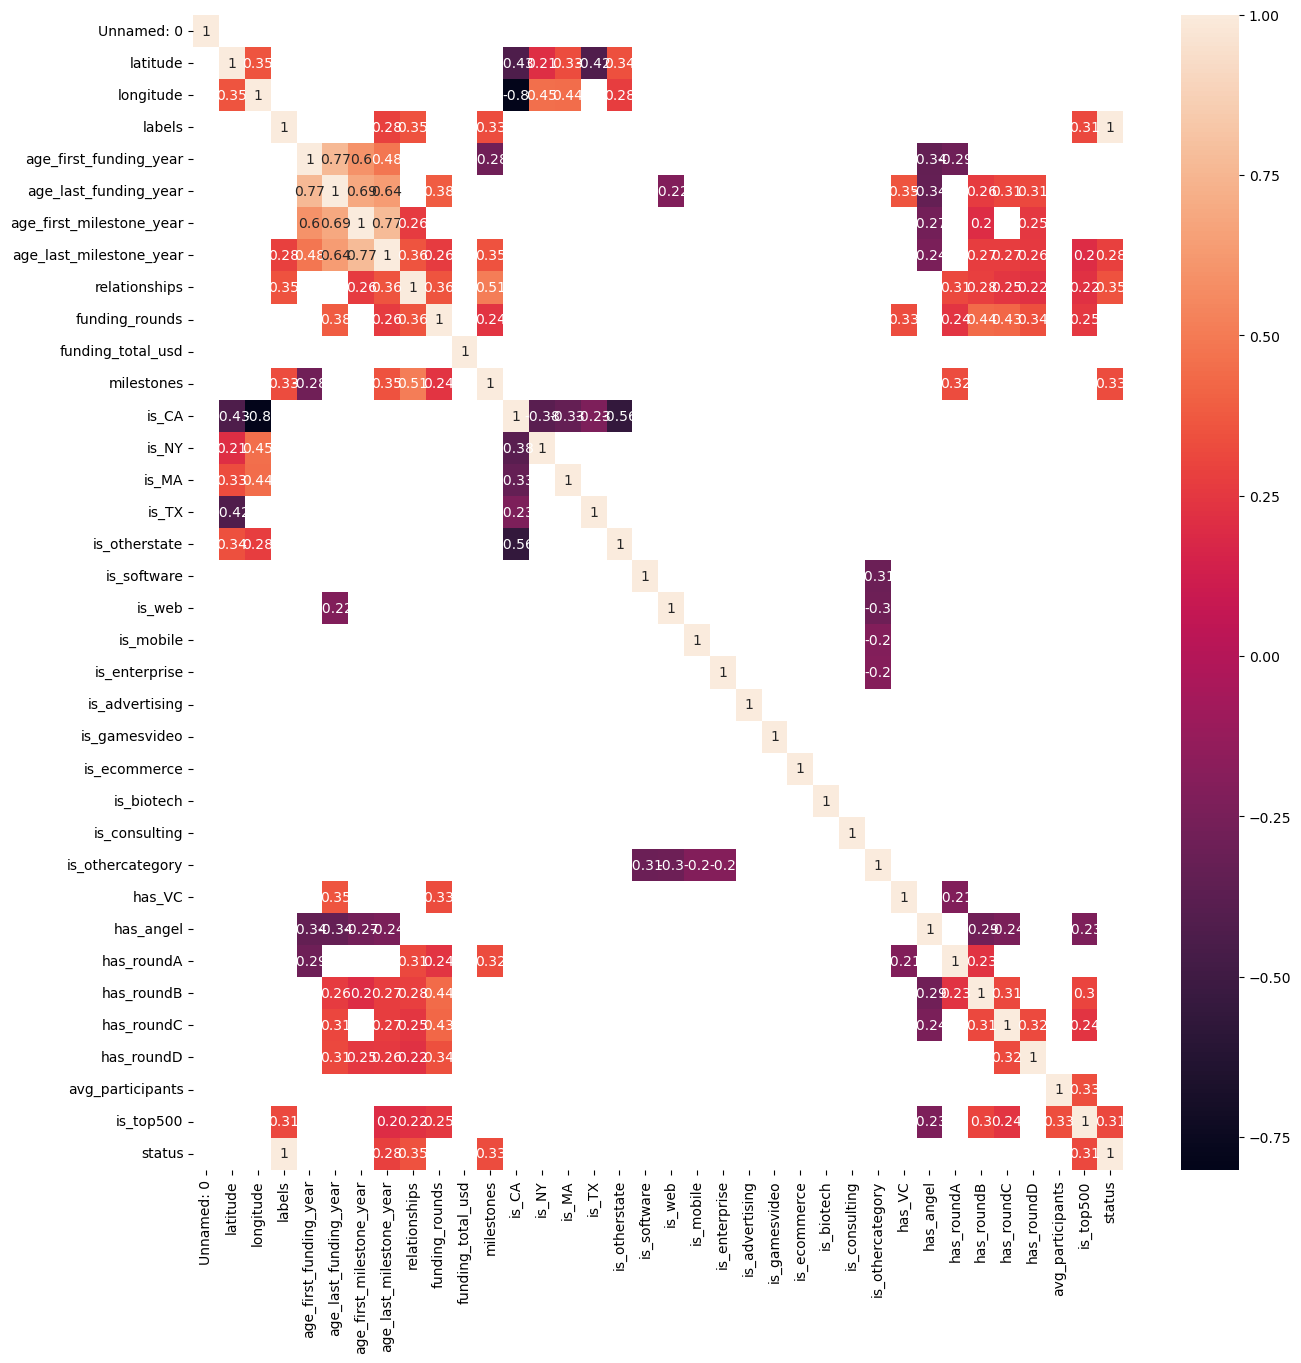

In [14]:
corr = num_df.corr()
high_corr = corr[abs(corr)>0.2]
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, annot = True)

In [15]:
# From the correlation heatmap we understand that we need to drop the following columns:
# Labels is highly correlated with status, will drop


In [16]:
data['state_code'].unique()

array(['CA', 'MA', 'KY', 'NY', 'CO', 'VA', 'TX', 'WA', 'IL', 'NC', 'PA',
       'GA', 'NH', 'MO', 'FL', 'NJ', 'WV', 'MI', 'DC', 'CT', 'MD', 'OH',
       'TN', 'MN', 'RI', 'OR', 'UT', 'ME', 'NV', 'NM', 'IN', 'AZ'],
      dtype=object)

In [17]:
data['state_code'].nunique()

32

In [18]:
# We want to see the top 3 states with the most start ups
data['state_code'].value_counts().head(3)

state_code
CA    431
NY     96
MA     75
Name: count, dtype: int64

In [19]:
data['category_code'].nunique()

35

In [20]:
data['category_code'].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [21]:
data['category_code'].value_counts().head(10)

category_code
software           138
web                132
mobile              68
enterprise          67
advertising         54
games_video         47
network_hosting     32
biotech             31
semiconductor       28
ecommerce           24
Name: count, dtype: int64

In [22]:
# We only want the top 3 states, so we are moving the Texas start ups in the otherstate column 
data['is_otherstate'] = data['is_otherstate'] + data['is_TX']

In [23]:
# Columns too look into more   'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', : probably to make them dates
# Columns for OHE 'category_code'

In [24]:
# OHE in category_code column, then I will also drop the 

OHE_col = ['category_code']
data = pd.get_dummies(data,columns = OHE_col)
data.replace(to_replace = [True, False],value = [1,0], inplace = True)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Expanding the 4 columns into years and months 
data['founded_at']=pd.to_datetime(data['founded_at'])
data['funded_year']=data['founded_at'].dt.year
#data['funded_month']=data['founded_at'].dt.month
data['funded_year'].info()

data['closed_at']=pd.to_datetime(data['closed_at'])
data['closure_year']=data['closed_at'].dt.year
#data['closure_month']=data['closed_at'].dt.month
data['closure_year'].info()

data['first_funding_at']=pd.to_datetime(data['first_funding_at'])
data['first_funded_year']=data['first_funding_at'].dt.year
#data['first_funded_month']=data['first_funding_at'].dt.month

data['last_funding_at']=pd.to_datetime(data['last_funding_at'])
data['last_funded_year']=data['last_funding_at'].dt.year
#data['last_funded_month']=data['last_funding_at'].dt.month

<class 'pandas.core.series.Series'>
RangeIndex: 823 entries, 0 to 822
Series name: funded_year
Non-Null Count  Dtype
--------------  -----
823 non-null    int32
dtypes: int32(1)
memory usage: 3.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 823 entries, 0 to 822
Series name: closure_year
Non-Null Count  Dtype  
--------------  -----  
302 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [26]:
# Fill in null values on the dates with 0, as we do not have the information:

data['closure_year'] = data['closure_year'].fillna(value=0)
#data['closure_month'] = data['closure_month'].fillna(value=0)
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value=0)
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value=0)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      823 non-null    int64         
 1   state_code                      823 non-null    object        
 2   latitude                        823 non-null    float64       
 3   longitude                       823 non-null    float64       
 4   zip_code                        823 non-null    object        
 5   id                              823 non-null    object        
 6   city                            823 non-null    object        
 7   Unnamed: 6                      384 non-null    object        
 8   name                            823 non-null    object        
 9   labels                          823 non-null    int64         
 10  founded_at                      823 non-null    datetime64[ns]
 11  closed

In [28]:
data.isnull().sum()

Unnamed: 0                          0
state_code                          0
latitude                            0
longitude                           0
zip_code                            0
id                                  0
city                                0
Unnamed: 6                        439
name                                0
labels                              0
founded_at                          0
closed_at                         521
first_funding_at                    0
last_funding_at                     0
age_first_funding_year              0
age_last_funding_year               0
age_first_milestone_year            0
age_last_milestone_year             0
relationships                       0
funding_rounds                      0
funding_total_usd                   0
milestones                          0
state_code.1                        1
is_CA                               0
is_NY                               0
is_MA                               0
is_TX       

In [29]:
data.isnull().sum().sum()

961

In [30]:
# Drop columns with no useful/important information and highly correlated columns

data.drop(['Unnamed: 0', 'Unnamed: 6' , 'zip_code', 'state_code', 'state_code.1', 'name', 'labels', 'is_TX', 'id', 'city', 'object_id', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'] , axis =1, inplace = True)

In [31]:
data.shape

(823, 72)

In [32]:
data.head()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,0.0,2005,2009
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,0.0,2010,2010
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,0.0,2005,2007
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2012.0,2010,2012


In [33]:
# Checking for any remaining null values:

data.isnull().sum().sum()

0

<Axes: >

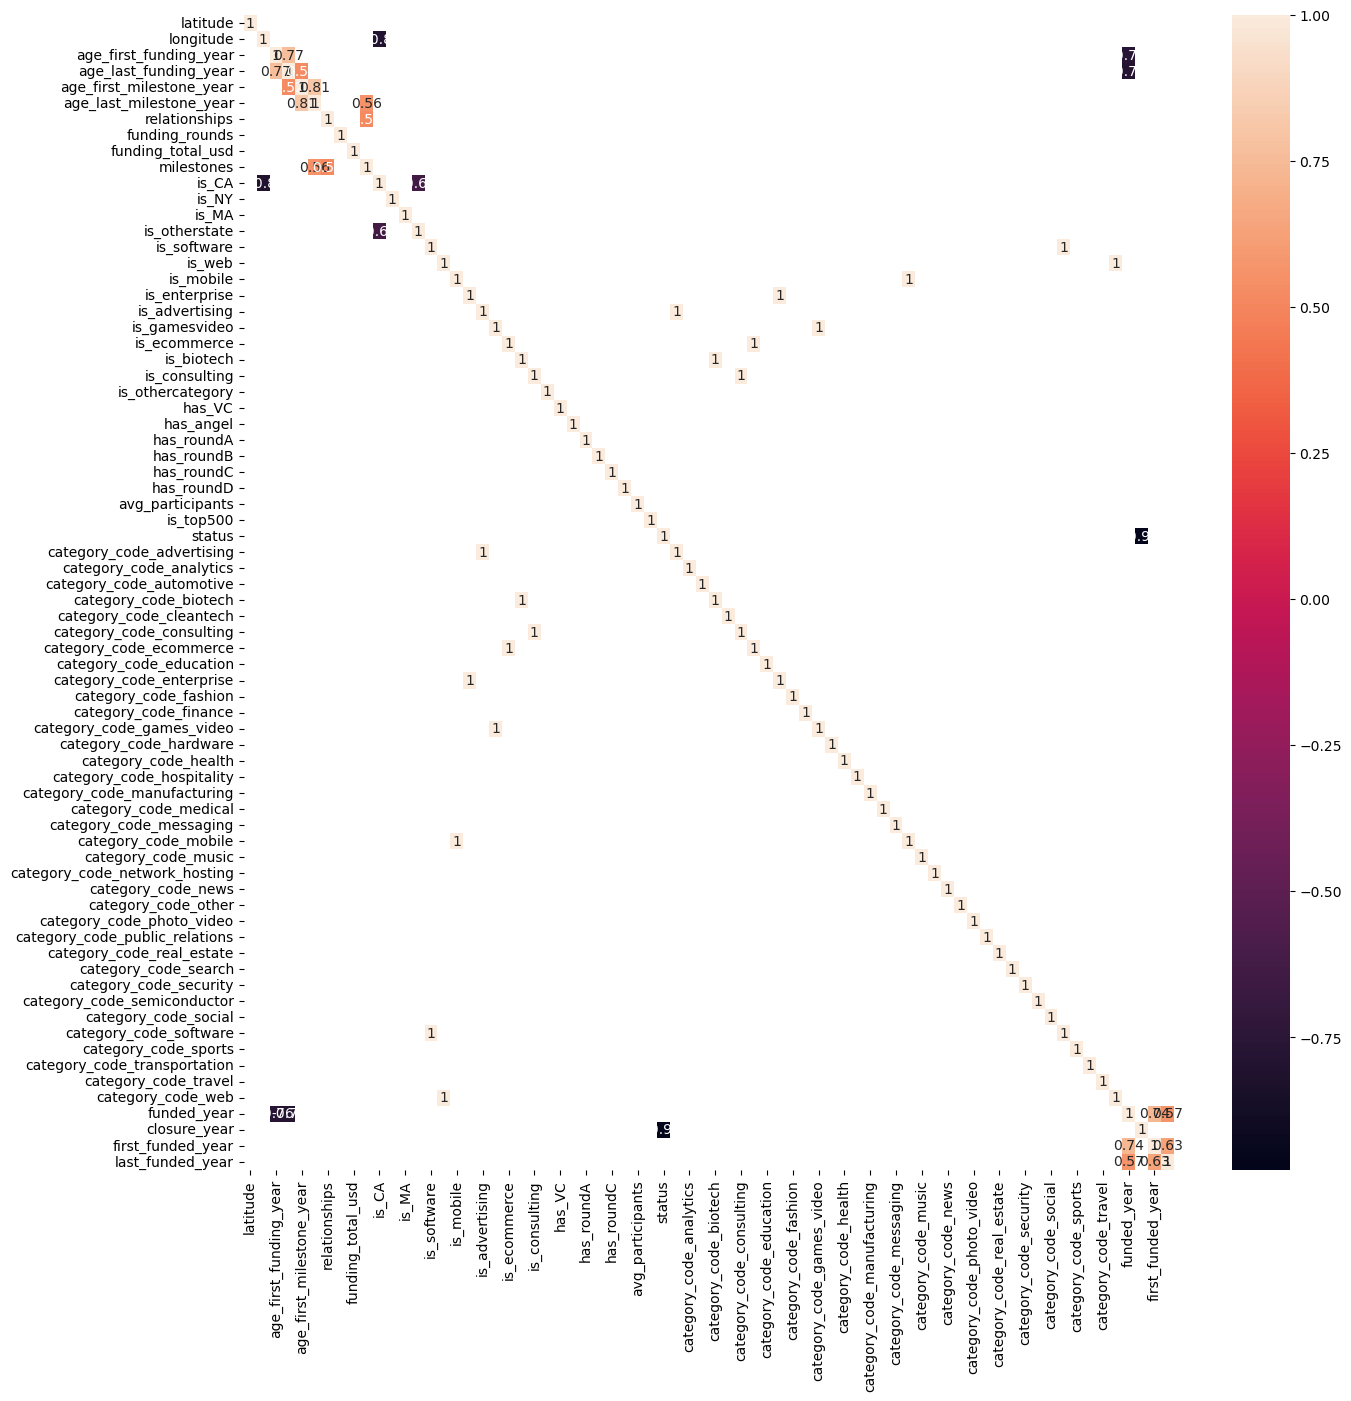

In [34]:
# create a heatmap to see the correlations >0.5 between the columns
corr = data.corr()
high_corr = corr[abs(corr)>0.5]
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, annot = True)

In [35]:
data['status'].value_counts() # 1 = acquired, 0 = closed

status
1    530
0    293
Name: count, dtype: int64

In [36]:
acquired_df = pd.DataFrame(data[data['status'] == 1]) # 1 = acquired
acquired_df .head(1)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.35888,-71.05682,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010


In [37]:
print(acquired_df['closure_year'].unique()) # where the company was acquired, the closure year is 0

[   0. 2001. 2011. 2009. 2013. 2012. 2008. 2010.]


In [38]:
print(acquired_df['closure_year'].nunique()) 

8


In [39]:
print(acquired_df['closure_year'].value_counts())# where the company was acquired, the closure year is 0

closure_year
0.0       521
2011.0      3
2001.0      1
2009.0      1
2013.0      1
2012.0      1
2008.0      1
2010.0      1
Name: count, dtype: int64


In [40]:
df = data.copy()

# MODEL

### Model using Random Forest with all features included: 

In [41]:
# Splitting the data into X and y
X = df.drop('status' , axis = 1)
y = df['status']

In [42]:
X.head(5)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,0.0,2005,2009
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,0.0,2010,2010
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,0.0,2005,2007
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2012.0,2010,2012


In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Step 1: Scale the data using RobustScaler because it is robust to outliers and I have not removed them yet 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:

# Instantiate RandomForestClassifier
classifier1 = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the classifier on the training data
classifier1.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred1 = classifier1.predict(X_test_scaled)

# Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred1)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred1)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred1))



Test Set Metrics:
F1 Score (Test): 0.9855072463768116
Balanced Accuracy (Test): 0.9857142857142858
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.97      0.99       105

    accuracy                           0.98       165
   macro avg       0.98      0.99      0.98       165
weighted avg       0.98      0.98      0.98       165



check for overfitting

In [46]:
# Initialize and fit RandomForestClassifier
classifier1 = RandomForestClassifier(class_weight='balanced', random_state=42)
classifier1.fit(X_train_scaled, y_train)

# Predictions on training and test sets
y_pred_train1 = classifier1.predict(X_train_scaled)

# Metrics on training set
f1_train = f1_score(y_train, y_pred_train1)
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train1)

print("Training Set Metrics:")
print("F1 Score (Training):", f1_train)
print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Classification Report (Training):\n", classification_report(y_train, y_pred_train1))

# Compare training and test data metrics
print("\nComparison of Training and Test Data Metrics:")
print("F1 Score - Training: {}, Test: {}".format(f1_train, f1_test))
print("Balanced Accuracy - Training: {}, Test: {}".format(balanced_accuracy_train, balanced_accuracy_test))

Training Set Metrics:
F1 Score (Training): 1.0
Balanced Accuracy (Training): 1.0
Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       425

    accuracy                           1.00       658
   macro avg       1.00      1.00      1.00       658
weighted avg       1.00      1.00      1.00       658


Comparison of Training and Test Data Metrics:
F1 Score - Training: 1.0, Test: 0.9855072463768116
Balanced Accuracy - Training: 1.0, Test: 0.9857142857142858


we are dealing with overfitting

### Model using Random Forest with feature selection kbest, k=15: 

In [47]:
X = df.drop('status' , axis = 1)
y = df['status']

In [48]:
X.head(5)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_hardware,category_code_health,category_code_hospitality,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_network_hosting,category_code_news,category_code_other,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funded_year,closure_year,first_funded_year,last_funded_year
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,0.0,2009,2010
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,0.0,2005,2009
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2009,0.0,2010,2010
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2002,0.0,2005,2007
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2012.0,2010,2012


In [49]:
# Step 1: Feature Selection using SelectKBest with k=15
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 2: Instantiate RandomForestClassifier with balanced class weights and tune hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Limit tree depth to avoid overfitting
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

classifier2 = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(classifier2, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train_selected, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation F1 Score:", grid_search.best_score_)

# Step 3: Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test_selected)

# Step 4: Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred2)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred2)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred2))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation F1 Score: 0.9901410486035666

Test Set Metrics:
F1 Score (Test): 0.9855072463768116
Balanced Accuracy (Test): 0.9857142857142858
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.97      0.99       105

    accuracy                           0.98       165
   macro avg       0.98      0.99      0.98       165
weighted avg       0.98      0.98      0.98       165



check for overfitting

In [50]:
# Assuming X and y are your data and target variables, and you've already split and scaled them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Initialize RandomForestClassifier
classifier2 = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 2: Fit the classifier on the training data
classifier2.fit(X_train_scaled, y_train)

# Step 3: Predictions on training set
y_pred_train2 = classifier2.predict(X_train_scaled)

# Step 4: Metrics on training set
f1_train = f1_score(y_train, y_pred_train2)
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train2)

print("Training Set Metrics:")
print("F1 Score (Training):", f1_train)
print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Classification Report (Training):\n", classification_report(y_train, y_pred_train2))

# Step 5: Compare training data metrics to check for overfitting
print("\nComparison of Training Data Metrics:")
print("F1 Score - Training:", f1_train)
print("Balanced Accuracy - Training:", balanced_accuracy_train)

Training Set Metrics:
F1 Score (Training): 1.0
Balanced Accuracy (Training): 1.0
Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       425

    accuracy                           1.00       658
   macro avg       1.00      1.00      1.00       658
weighted avg       1.00      1.00      1.00       658


Comparison of Training Data Metrics:
F1 Score - Training: 1.0
Balanced Accuracy - Training: 1.0


we are dealing with overfitting again

-------------------------------------------------------------------------------------------
# Droping also closure year from X to check again the scores 

In [51]:
X = df.drop(['status', 'closure_year'], axis = 1)
y = df['status']

In [52]:

# Step 1: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the data using RobustScaler (optional)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature Selection using SelectKBest with k=15
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Instantiate RandomForestClassifier with balanced class weights
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 5: Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20]  # Limit tree depth to avoid overfitting
}

# Step 6: Perform GridSearchCV to find best parameters
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train_selected, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation F1 Score:", grid_search.best_score_)

# Step 7: Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)

# Step 8: Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Cross-validation F1 Score: 0.7449654816872119

Test Set Metrics:
F1 Score (Test): 0.8260869565217391
Balanced Accuracy (Test): 0.7023809523809523
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.75      0.50      0.60        60
           1       0.76      0.90      0.83       105

    accuracy                           0.76       165
   macro avg       0.76      0.70      0.71       165
weighted avg       0.76      0.76      0.74       165



this looks better so I will proceed as follows>

New dataframe creation: We clearly can see that closure_year columns created overfitting on our data so we will create a new dataframe without this column and we will continue working with this as base going forward.

In [53]:
data_clean = df.copy()

In [54]:
data_clean.columns

Index(['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'category_code_advertising',
       'category_code_analytics', 'category_code_automotive',
       'category_code_biotech', 'category_code_cleantech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_fashion', 'category_code_finance',
       'category_code_games_video', 'category_code_hardware',
       'category_cod

In [55]:
data_clean.drop('closure_year', axis =1, inplace = True)

In [56]:
data_clean.columns

Index(['latitude', 'longitude', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'category_code_advertising',
       'category_code_analytics', 'category_code_automotive',
       'category_code_biotech', 'category_code_cleantech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_fashion', 'category_code_finance',
       'category_code_games_video', 'category_code_hardware',
       'category_cod

In [57]:
df2 = data_clean.copy()

### Model Tuning -Random Forest with kbest k=15 based on the new dataframe

In [58]:
X = df2.drop('status', axis = 1)
y = df2['status']

In [59]:
y.value_counts()

status
1    530
0    293
Name: count, dtype: int64

In [60]:
# We will also try downsampling to fix the clear imbalance of our data

Random Forest with kbest k=15 based on the new dataframe

In [61]:

# Step 1: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the data using RobustScaler (optional)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature Selection using SelectKBest with k=15
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Instantiate RandomForestClassifier with balanced class weights
classifier3 = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 5: Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20]  # Limit tree depth to avoid overfitting
}

# Step 6: Perform GridSearchCV to find best parameters
grid_search = GridSearchCV(classifier3, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train_selected, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation F1 Score:", grid_search.best_score_)

# Step 7: Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred3 = best_model.predict(X_test_selected)

# Step 8: Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred3)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred3)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred3))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Cross-validation F1 Score: 0.7449654816872119

Test Set Metrics:
F1 Score (Test): 0.8260869565217391
Balanced Accuracy (Test): 0.7023809523809523
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.75      0.50      0.60        60
           1       0.76      0.90      0.83       105

    accuracy                           0.76       165
   macro avg       0.76      0.70      0.71       165
weighted avg       0.76      0.76      0.74       165



check for overfitting

In [62]:
# Assuming X and y are your data and target variables, and you've already split and scaled them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Initialize RandomForestClassifier
classifier3 = RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 2: Fit the classifier on the training data
classifier3.fit(X_train_scaled, y_train)

# Step 3: Predictions on training set
y_pred_train3 = classifier3.predict(X_train_scaled)

# Step 4: Metrics on training set
f1_train = f1_score(y_train, y_pred_train3)
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train3)

print("Training Set Metrics:")
print("F1 Score (Training):", f1_train)
print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Classification Report (Training):\n", classification_report(y_train, y_pred_train3))

# Step 5: Compare training data metrics to check for overfitting
print("\nComparison of Training Data Metrics:")
print("F1 Score - Training:", f1_train)
print("Balanced Accuracy - Training:", balanced_accuracy_train)


Training Set Metrics:
F1 Score (Training): 1.0
Balanced Accuracy (Training): 1.0
Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       425

    accuracy                           1.00       658
   macro avg       1.00      1.00      1.00       658
weighted avg       1.00      1.00      1.00       658


Comparison of Training Data Metrics:
F1 Score - Training: 1.0
Balanced Accuracy - Training: 1.0


still dealing with overfitting

### Model with Gradient boosting, k15, downsampling and hyperparameter tuning

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler

# Assuming X and y are your data and target variables, and you've already split and scaled them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature Selection using SelectKBest with k=15
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Downsample the majority class using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_selected, y_train)

# Step 5: Instantiate GradientBoostingClassifier
classifier6 = GradientBoostingClassifier(random_state=42)

# Step 6: Define parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate shrinks the contribution of each tree
}

# Step 7: Perform GridSearchCV to find best parameters
grid_search = GridSearchCV(classifier6, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation F1 Score:", grid_search.best_score_)

# Step 8: Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred6 = best_model.predict(X_test_selected)

# Step 9: Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred6)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred6)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred6))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Cross-validation F1 Score: 0.7419407897322522

Test Set Metrics:
F1 Score (Test): 0.7755102040816326
Balanced Accuracy (Test): 0.736904761904762
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.61      0.75      0.67        60
           1       0.84      0.72      0.78       105

    accuracy                           0.73       165
   macro avg       0.72      0.74      0.72       165
weighted avg       0.75      0.73      0.74       165



CHECK FOR OVERFITTING

In [68]:

# Step 1: Initialize GradientBoostingClassifier
classifier6 = GradientBoostingClassifier(random_state=42)

# Step 2: Fit the classifier on the training data
classifier6.fit(X_train_scaled, y_train)

# Step 3: Predictions on training set
y_pred_train6 = classifier6.predict(X_train_scaled)

# Step 4: Metrics on training set
f1_train = f1_score(y_train, y_pred_train6)
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train6)

print("Training Set Metrics:")
print("F1 Score (Training):", f1_train)
print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Classification Report (Training):\n", classification_report(y_train, y_pred_train6))

# Step 5: Predictions on test set
y_pred_test = classifier.predict(X_test_scaled)

# Step 6: Metrics on test set
f1_test = f1_score(y_test, y_pred_test)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))

# Step 7: Compare training and test data metrics
print("\nComparison of Training and Test Data Metrics:")
print("F1 Score - Training:", f1_train)
print("F1 Score - Test:", f1_test)
print("Balanced Accuracy - Training:", balanced_accuracy_train)
print("Balanced Accuracy - Test:", balanced_accuracy_test)



Training Set Metrics:
F1 Score (Training): 0.9545454545454546
Balanced Accuracy (Training): 0.9190103509214844
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       233
           1       0.92      0.99      0.95       425

    accuracy                           0.94       658
   macro avg       0.95      0.92      0.93       658
weighted avg       0.94      0.94      0.94       658


Test Set Metrics:
F1 Score (Test): 0.8036529680365296
Balanced Accuracy (Test): 0.7023809523809523
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.67      0.57      0.61        60
           1       0.77      0.84      0.80       105

    accuracy                           0.74       165
   macro avg       0.72      0.70      0.71       165
weighted avg       0.73      0.74      0.73       165


Comparison of Training and Test Data Metrics:
F1 Score - Training: 0

These results indicate that there might be some degree of overfitting, though it's not excessively bad.

### Model with Gradient boosting, k10, downsampling and hyperparameter tuning

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X and y are your data and target variables, and you've already split them
# Step 1: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the data using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Feature Selection using SelectKBest with k=10
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 4: Downsample the majority class using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_selected, y_train)

# Step 5: Instantiate GradientBoostingClassifier
classifier7 = GradientBoostingClassifier(random_state=42)

# Step 6: Define parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate shrinks the contribution of each tree
}

# Step 7: Perform GridSearchCV to find best parameters
grid_search = GridSearchCV(classifier7, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation F1 Score:", grid_search.best_score_)

# Step 8: Predict on the training set with the best model to check for overfitting
best_model = grid_search.best_estimator_
y_pred_train7 = best_model.predict(X_train_resampled)

# Step 9: Calculate metrics on the training set
f1_train = f1_score(y_train_resampled, y_pred_train7)
balanced_accuracy_train = balanced_accuracy_score(y_train_resampled, y_pred_train7)

print("\nTraining Set Metrics:")
print("F1 Score (Training):", f1_train)
print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Classification Report (Training):\n", classification_report(y_train_resampled, y_pred_train7))

# Step 10: Predict on the test set with the best model
y_pred_test7 = best_model.predict(X_test_selected)

# Step 11: Calculate metrics on the test set
f1_test = f1_score(y_test, y_pred_test)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test7)

print("\nTest Set Metrics:")
print("F1 Score (Test):", f1_test)
print("Balanced Accuracy (Test):", balanced_accuracy_test)
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test7))

# Step 7: Compare training and test data metrics
print("\nComparison of Training and Test Data Metrics:")
print("F1 Score - Training:", f1_train)
print("F1 Score - Test:", f1_test)
print("Balanced Accuracy - Training:", balanced_accuracy_train)
print("Balanced Accuracy - Test:", balanced_accuracy_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Cross-validation F1 Score: 0.7287625218400627

Training Set Metrics:
F1 Score (Training): 0.8388429752066116
Balanced Accuracy (Training): 0.8326180257510729
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.86      0.79      0.83       233
           1       0.81      0.87      0.84       233

    accuracy                           0.83       466
   macro avg       0.83      0.83      0.83       466
weighted avg       0.83      0.83      0.83       466


Test Set Metrics:
F1 Score (Test): 0.7980295566502463
Balanced Accuracy (Test): 0.7440476190476191
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.64      0.72      0.68        60
           1       0.83      0.77      0.80       105

    accuracy                           0

These metrics suggest that the model is performing slightly better on the training set compared to the test set, but the difference is not excessively large.Classifier 6 shows higher training metrics but a larger drop-off to the test set, suggesting potential overfitting, thought not too bad. Classifier 7 is preferable if generalization to new, unseen data is more critical.

CONCLUSION

Difference in Metrics (Test - Training):
F1 Score Difference: -0.0408134185563653
Balanced Accuracy Difference: -0.08857040670345385

Negative values indicate that the test set performance is lower than the training set, which is typical and not necessarily a sign of overfitting unless the difference is significant

These differences are not extremely large, suggesting that while there is some drop-off from training to test, it's within a reasonable range. This indicates that the model is not heavily overfitting and is generalizing reasonably well to unseen data.